# 01 - Data Understanding 
* (1) Get all files list
* (2) Load one subject file
* (3) Plot one device of recording
* (4) Simple data quality check 
* (5) Check activity type and plot Walking activity 
* (6) Zoom-in plot of Walking activity 
* (7) Use functions for data visualization

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

## (1) Load one subject file
- List all CSV files
- Load one CSV file


In [23]:
'''
(1) Get all files list
Obtain a list of all CSV files 
'''
data_path = "../data/raw_accelerometry_data/" # Directory of raw accelerometer data 
all_files = glob.glob(data_path+'*.csv')      # Get names for all CSV files
print(all_files[:2])                          # Check file outputs
print('Total CVS files =',len(all_files))                         # Check how many CSV files

['../data/raw_accelerometry_data/idf1ce9a0f.csv', '../data/raw_accelerometry_data/idff99de96.csv']
Total CVS files = 32


In [24]:
'''
(2) Load one subject file
Load one accelerometer file for initial data visualization
-----------------
(Below information obtained from the raw data directory)

time_s: Time in seconds from device initiation
_x, _y, _z: Acceleration measured with respect to Earth's gravity (g = 9.81 meters per squared second)

Device position:
lw: left wrist
rw: right wrist
lh: left hip
rg: right hip
la: left ankle
ra: right ankle

Type of activity:
1=walking; 
2=descending stairs; 
3=ascending stairs; 
4=driving; 
77=clapping; 
99=non-study activity
'''
file_id = all_files[0]     # Load one CSV file
print(file_id)             # Print out file name
df = pd.read_csv(file_id)  # Load CSV file into a dataframe
df.head(5)                 # 

../data/raw_accelerometry_data/idf1ce9a0f.csv


,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
0,99,0.01,0.059,0.922,-0.453,-0.078,0.973,-0.371,0.035,0.941,-0.215,0.184,0.965,-0.180
1,99,0.02,-0.539,-0.094,1.008,-0.348,-0.281,0.871,-0.266,-0.309,1.191,-0.324,0.324,0.734
2,99,0.03,-0.664,-0.305,1.074,-0.160,-0.703,0.879,0.137,-0.684,1.422,-0.266,0.664,1.117
3,99,0.04,-0.684,-0.309,0.125,0.027,-0.762,0.047,0.426,-0.719,0.648,-0.121,0.898,0.492
4,99,0.05,-0.809,-0.363,-0.418,0.105,-0.805,-0.313,0.547,-0.758,0.313,-0.063,0.969,0.223


Text(0.5,1,'idf1ce9a0f.csv')

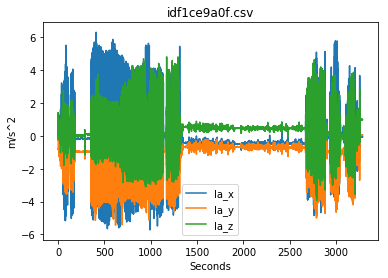

In [29]:
'''
(3) Plot one device of recording
Get an overview plot. Make sure the unit make sense. 
'''
device_location = 'la'
loc_x = device_location+'_x'
loc_y = device_location+'_y'
loc_z = device_location+'_z'

plt.plot(df.time_s, df[loc_x], label=loc_x)
plt.plot(df.time_s, df[loc_y], label=loc_y)
plt.plot(df.time_s, df[loc_z], label=loc_z)
plt.xlabel('Seconds')
plt.ylabel('m/s^2')
plt.legend()
title = file_id.split('/')[-1]
plt.title(title)

In [53]:
'''
(4) Simple data quality check 
Accelerometer data quality check
'''
# Check sampling rate
print(np.unique(df.time_s.diff()))

# Check any missing data point
print(df.isnull().sum())

# Check the units of Y-axis and X-asis

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01  nan]
activity    0
time_s      0
lw_x        0
lw_y        0
lw_z        0
lh_x        0
lh_y        0
lh_z        0
la_x        0
la_y        0
la_z        0
ra_x        0
ra_y        0
ra_z        0
dtype: int64


[ 1  2  3  4 77 99]


Text(0.5,1,'idf1ce9a0f.csv: Walking / la')

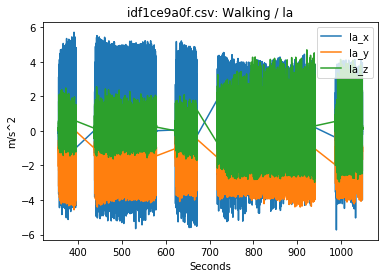

In [54]:
'''
(5) Check activity type and plot Walking activity 
'''
print(np.unique(df.activity))    # Print all activity id

df2 = df[df.activity==1]

# Plot Walking activity 
plt.plot(df2.time_s, df2[loc_x], label=loc_x)
plt.plot(df2.time_s, df2[loc_y], label=loc_y)
plt.plot(df2.time_s, df2[loc_z], label=loc_z)
plt.xlabel('Seconds')
plt.ylabel('m/s^2')
plt.legend()
title = file_id.split('/')[-1]
plt.title(title+": Walking / "+device_location)

Text(0.5,1,'idf1ce9a0f.csv: Walking / la')

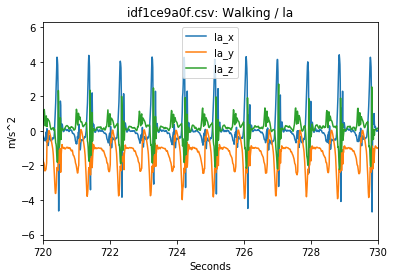

In [32]:
'''
(6) Zoom-in plot of Walking activity 
'''
# Plot zoom-in of Walking
plt.plot(df2.time_s, df2[loc_x], label=loc_x)
plt.plot(df2.time_s, df2[loc_y], label=loc_y)
plt.plot(df2.time_s, df2[loc_z], label=loc_z)
plt.xlim(720,730)
plt.xlabel('Seconds')
plt.ylabel('m/s^2')
plt.legend()
title = file_id.split('/')[-1]
plt.title(title+": Walking / "+device_location)

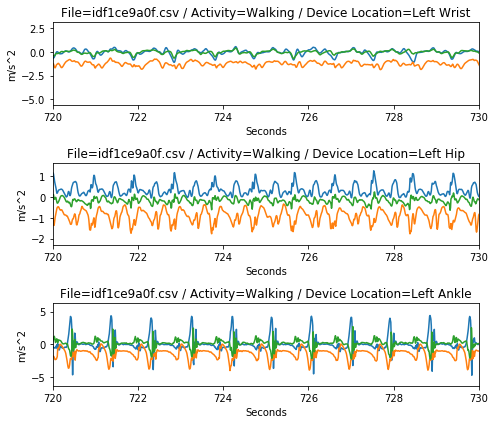

In [38]:
'''
(7) Use functions for data visualization
Acc data comparision for Walking among different device locations
Write the scripts in function so that we may check diffrent outputs quickly  
'''
def load_data(file_id):
    data_path = "../data/raw_accelerometry_data/" # Directory of raw accelerometer data 
    all_files = glob.glob(data_path+'*.csv')      # Get names for all CSV files

    file_id = all_files[file_id]     # Load one CSV file
    df = pd.read_csv(file_id) 
    return file_id, df

def plot_zoomin(file_id, df, activity, device_location):
    '''
    Function to plot a zoom-in acc records
    '''
    df2 = df[df.activity==activity]  # Select data for a certain Activity
    
    # Define device location
    loc_x = device_location+'_x'
    loc_y = device_location+'_y'
    loc_z = device_location+'_z'
    
    # Check activity type
    if activity==1:
        activity_type = "Walking"
    elif activity==2:
        activity_type = "Descending Stairs"
    elif activity==3:
        activity_type = "Ascending Stairs"
    elif activity==4:
        activity_type = "Driving"
    elif activity==5:
        activity_type = "Clapping"
    elif activity==6:
        activity_type = "Non-study Activity"
        
    # Check device location
    if device_location=='lw':
        loc = "Left Wrist"    
    elif device_location=='rw':
        loc = "Right Wrist" 
    elif device_location=='lh':
        loc = "Left Hip"
    elif device_location=='rh':
        loc = "Right Hip"        
    elif device_location=='la':
        loc = "Left Ankle"
    elif device_location=='ra':
        loc = "Right Ankle"
        
    # Plot zoom-in Acc data
    plt.plot(df2.time_s, df2[loc_x], label=loc_x)
    plt.plot(df2.time_s, df2[loc_y], label=loc_y)
    plt.plot(df2.time_s, df2[loc_z], label=loc_z)
    plt.xlabel('Seconds')
    plt.ylabel('m/s^2')
    file_id = file_id.split('/')[-1]
    plt.title('File='+file_id+' / Activity='+activity_type+' / Device Location='+loc)


# Begin to plot Walking activity observed from three locations:    
file_id = 0          # load the first CSV file
file_id, df = load_data(file_id)

activity = 1         # plot Activity=1 (Walking)
plot_zoomin == True  # Plot Zoom-in or not
t0 = 720             # Define t_begin of the zoom-in
t1 = 730             # Define t_end of the zoom-in

plt.figure(figsize=(7,6))

plt.subplot(311)
device_location = 'lw'
plot_zoomin(file_id, df, activity, device_location)
if plot_zoomin:
    plt.xlim(t0, t1)
plt.subplot(312)
device_location = 'lh'
plot_zoomin(file_id, df, activity, device_location)
if plot_zoomin:
    plt.xlim(t0, t1)

plt.subplot(313)
device_location = 'la'
plot_zoomin(file_id, df, activity, device_location)
if plot_zoomin:
    plt.xlim(t0, t1)

plt.tight_layout()